<a href="https://www.kaggle.com/code/luchales/xgboost-acc-score-79?scriptVersionId=116879035" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# **Data cleaning**

In [7]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [9]:
test['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [10]:
test['Destination'].value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [11]:
train['HomePlanet'] = train['HomePlanet'].fillna('Earth')
train['Destination']=train['Destination'].fillna('TRAPPIST-1e')
test['HomePlanet']=test['HomePlanet'].fillna('Earth')
test['Destination']=test['Destination'].fillna('TRAPPIST-1e')

In [12]:
train['CryoSleep']=1*(train['CryoSleep'])
train['CryoSleep'].mean()

0.35830580462482303

In [13]:
train['CryoSleep'].value_counts()

0    5439
1    3037
Name: CryoSleep, dtype: int64

In [14]:
train['CryoSleep']=train['CryoSleep'].fillna(0)
test['CryoSleep']=test['CryoSleep'].fillna(0)

In [15]:
train['Age'].mean()

28.82793046746535

In [16]:
train.pivot_table(index=['HomePlanet','FoodCourt','ShoppingMall'],values='Age',aggfunc=['mean','median'])

mean median
                                         Age    Age
HomePlanet FoodCourt ShoppingMall                  
Earth      0.0       0.0           22.089412   21.0
                     1.0           30.921053   25.5
                     2.0           28.736842   29.0
                     3.0           22.636364   20.0
                     4.0           23.615385   23.0
...                                      ...    ...
Mars       2119.0    315.0         43.000000   43.0
           2207.0    163.0         24.000000   24.0
           2318.0    5.0           38.000000   38.0
           2876.0    202.0         22.000000   22.0
           4389.0    1015.0        35.000000   35.0

[3447 rows x 2 columns]

In [17]:
train['Age']=train['Age'].fillna(train.groupby(['HomePlanet','FoodCourt','ShoppingMall'])['Age'].transform('median'))

In [18]:
train['Age']=train['Age'].fillna(29)

In [19]:
test['Age'].mean()

28.65814620162446

In [20]:
test.pivot_table(index=['HomePlanet','FoodCourt','ShoppingMall'],values='Age',aggfunc=['mean','median'])

mean median
                                         Age    Age
HomePlanet FoodCourt ShoppingMall                  
Earth      0.0       0.0           22.551456   21.0
                     1.0           21.928571   22.5
                     2.0           30.666667   28.0
                     3.0           29.727273   25.0
                     4.0           36.600000   44.0
...                                      ...    ...
Mars       1347.0    197.0         38.000000   38.0
           1439.0    528.0         43.000000   43.0
           1628.0    1184.0        50.000000   50.0
           1633.0    83.0          20.000000   20.0
           1977.0    188.0         43.000000   43.0

[1801 rows x 2 columns]

In [21]:
test['Age']=test['Age'].fillna(test.groupby(['HomePlanet','FoodCourt','ShoppingMall'])['Age'].transform('median'))

In [22]:
test['Age']=test['Age'].fillna(29)

In [23]:
train['VIP']=1*(train['VIP'])
train['VIP'].mean()

0.023439340400471142

In [24]:
train['VIP']=train['VIP'].fillna(0)

In [25]:
test['VIP']=1*(test['VIP'])
test['VIP'].mean()

0.01768642447418738

In [26]:
test['VIP']=test['VIP'].fillna(0)

In [27]:
train['RoomService'].mean()

224.687617481203

In [28]:
train.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='RoomService',aggfunc=['mean','median'])

mean      median
                                        RoomService RoomService
HomePlanet Age  CryoSleep Destination                          
Earth      0.0  0         55 Cancri e           0.0         0.0
                          TRAPPIST-1e           0.0         0.0
                1         55 Cancri e           0.0         0.0
                          PSO J318.5-22         0.0         0.0
                          TRAPPIST-1e           0.0         0.0
...                                             ...         ...
Mars       71.0 0         TRAPPIST-1e        1072.0      1072.0
                1         PSO J318.5-22         0.0         0.0
           73.0 0         TRAPPIST-1e         413.0       413.0
           75.0 1         TRAPPIST-1e           0.0         0.0
           76.0 1         TRAPPIST-1e           0.0         0.0

[915 rows x 2 columns]

In [29]:
train['RoomService']=train['RoomService'].fillna(train.groupby(['HomePlanet','Age','CryoSleep','Destination'])['RoomService'].transform('median'))

In [30]:
train['RoomService']=train['RoomService'].fillna(225)

In [31]:
test['RoomService'].mean()

219.26626936829558

In [32]:
test.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='RoomService',aggfunc=['mean','median'])

mean      median
                                        RoomService RoomService
HomePlanet Age  CryoSleep Destination                          
Earth      0.0  False     55 Cancri e           0.0         0.0
                          PSO J318.5-22         0.0         0.0
                          TRAPPIST-1e           0.0         0.0
                True      55 Cancri e           0.0         0.0
                          PSO J318.5-22         0.0         0.0
...                                             ...         ...
Mars       70.0 True      TRAPPIST-1e           0.0         0.0
           71.0 True      TRAPPIST-1e           0.0         0.0
           72.0 False     TRAPPIST-1e        2596.0      2596.0
           73.0 False     TRAPPIST-1e        1263.5      1263.5
           75.0 False     TRAPPIST-1e         940.0       940.0

[765 rows x 2 columns]

In [33]:
test['RoomService']=test['RoomService'].fillna(test.groupby(['HomePlanet','Age','CryoSleep','Destination'])['RoomService'].transform('median'))

In [34]:
test['RoomService']=test['RoomService'].fillna(219)

In [35]:
train['FoodCourt'].mean()

458.07720329024676

In [36]:
train.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='FoodCourt',aggfunc=['mean','median'])

mean    median
                                        FoodCourt FoodCourt
HomePlanet Age  CryoSleep Destination                      
Earth      0.0  0         55 Cancri e         0.0       0.0
                          TRAPPIST-1e         0.0       0.0
                1         55 Cancri e         0.0       0.0
                          PSO J318.5-22       0.0       0.0
                          TRAPPIST-1e         0.0       0.0
...                                           ...       ...
Mars       71.0 1         PSO J318.5-22       0.0       0.0
           72.0 1         TRAPPIST-1e         0.0       0.0
           73.0 0         TRAPPIST-1e         1.0       1.0
           75.0 1         TRAPPIST-1e         0.0       0.0
           76.0 1         TRAPPIST-1e         0.0       0.0

[916 rows x 2 columns]

In [37]:
train['FoodCourt']=train['FoodCourt'].fillna(train.groupby(['HomePlanet','Age','CryoSleep','Destination'])['FoodCourt'].transform('median'))

In [38]:
train['FoodCourt']=train['FoodCourt'].fillna(458)

In [39]:
test['FoodCourt'].mean()

439.4842963318149

In [40]:
test.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='FoodCourt',aggfunc=['mean','median'])

mean    median
                                        FoodCourt FoodCourt
HomePlanet Age  CryoSleep Destination                      
Earth      0.0  False     55 Cancri e         0.0       0.0
                          PSO J318.5-22       0.0       0.0
                          TRAPPIST-1e         0.0       0.0
                True      55 Cancri e         0.0       0.0
                          PSO J318.5-22       0.0       0.0
...                                           ...       ...
Mars       70.0 True      TRAPPIST-1e         0.0       0.0
           71.0 True      TRAPPIST-1e         0.0       0.0
           72.0 False     TRAPPIST-1e         0.0       0.0
           73.0 False     TRAPPIST-1e        42.5      42.5
           75.0 False     TRAPPIST-1e         0.0       0.0

[765 rows x 2 columns]

In [41]:
test['FoodCourt']=test['FoodCourt'].fillna(test.groupby(['HomePlanet','Age','CryoSleep','Destination'])['FoodCourt'].transform('median'))

In [42]:
test['FoodCourt']=test['FoodCourt'].fillna(439)

In [43]:
train['ShoppingMall'].mean()

173.72916912197996

In [44]:
train.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='ShoppingMall',aggfunc=['mean','median'])

mean       median
                                        ShoppingMall ShoppingMall
HomePlanet Age  CryoSleep Destination                            
Earth      0.0  0         55 Cancri e            0.0          0.0
                          TRAPPIST-1e            0.0          0.0
                1         55 Cancri e            0.0          0.0
                          PSO J318.5-22          0.0          0.0
                          TRAPPIST-1e            0.0          0.0
...                                              ...          ...
Mars       71.0 1         PSO J318.5-22          0.0          0.0
           72.0 1         TRAPPIST-1e            0.0          0.0
           73.0 0         TRAPPIST-1e          130.5        130.5
           75.0 1         TRAPPIST-1e            0.0          0.0
           76.0 1         TRAPPIST-1e            0.0          0.0

[919 rows x 2 columns]

In [45]:
train['ShoppingMall']=train['ShoppingMall'].fillna(train.groupby(['HomePlanet','Age','CryoSleep','Destination'])['ShoppingMall'].transform('median'))

In [46]:
train['ShoppingMall']=train['ShoppingMall'].fillna(173)

In [47]:
test['ShoppingMall'].mean()

177.29552524527398

In [48]:
test.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='ShoppingMall',aggfunc=['mean','median'])

mean       median
                                        ShoppingMall ShoppingMall
HomePlanet Age  CryoSleep Destination                            
Earth      0.0  False     55 Cancri e            0.0          0.0
                          PSO J318.5-22          0.0          0.0
                          TRAPPIST-1e            0.0          0.0
                True      55 Cancri e            0.0          0.0
                          PSO J318.5-22          0.0          0.0
...                                              ...          ...
Mars       69.0 False     TRAPPIST-1e         1131.0       1131.0
           70.0 True      TRAPPIST-1e            0.0          0.0
           72.0 False     TRAPPIST-1e          193.0        193.0
           73.0 False     TRAPPIST-1e          662.5        662.5
           75.0 False     TRAPPIST-1e            0.0          0.0

[763 rows x 2 columns]

In [49]:
test['ShoppingMall']=test['ShoppingMall'].fillna(test.groupby(['HomePlanet','Age','CryoSleep','Destination'])['ShoppingMall'].transform('median'))

In [50]:
test['ShoppingMall']=test['ShoppingMall'].fillna(177)

In [51]:
train['Spa'].mean()

311.1387779083431

In [52]:
train.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='Spa',aggfunc=['mean','median'])

mean median
                                           Spa    Spa
HomePlanet Age  CryoSleep Destination                
Earth      0.0  0         55 Cancri e      0.0    0.0
                          TRAPPIST-1e      0.0    0.0
                1         55 Cancri e      0.0    0.0
                          PSO J318.5-22    0.0    0.0
                          TRAPPIST-1e      0.0    0.0
...                                        ...    ...
Mars       71.0 1         PSO J318.5-22    0.0    0.0
           72.0 1         TRAPPIST-1e      0.0    0.0
           73.0 0         TRAPPIST-1e    638.0  638.0
           75.0 1         TRAPPIST-1e      0.0    0.0
           76.0 1         TRAPPIST-1e      0.0    0.0

[916 rows x 2 columns]

In [53]:
train['Spa']=train['Spa'].fillna(train.groupby(['HomePlanet','Age','CryoSleep','Destination'])['Spa'].transform('median'))

In [54]:
train['Spa']=train['Spa'].fillna(311)

In [55]:
test['Spa'].mean()

303.05244252873564

In [56]:
test.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='Spa',aggfunc=['mean','median'])

mean  median
                                            Spa     Spa
HomePlanet Age  CryoSleep Destination                  
Earth      0.0  False     55 Cancri e       0.0     0.0
                          PSO J318.5-22     0.0     0.0
                          TRAPPIST-1e       0.0     0.0
                True      55 Cancri e       0.0     0.0
                          PSO J318.5-22     0.0     0.0
...                                         ...     ...
Mars       70.0 True      TRAPPIST-1e       0.0     0.0
           71.0 True      TRAPPIST-1e       0.0     0.0
           72.0 False     TRAPPIST-1e       0.0     0.0
           73.0 False     TRAPPIST-1e     817.5   817.5
           75.0 False     TRAPPIST-1e    1188.0  1188.0

[760 rows x 2 columns]

In [57]:
test['Spa']=test['Spa'].fillna(test.groupby(['HomePlanet','Age','CryoSleep','Destination'])['Spa'].transform('median'))

In [58]:
test['Spa']=test['Spa'].fillna(303)

In [59]:
train['VRDeck'].mean()

304.8547912992357

In [60]:
train.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='VRDeck',aggfunc=['mean','median'])

mean median
                                        VRDeck VRDeck
HomePlanet Age  CryoSleep Destination                
Earth      0.0  0         55 Cancri e      0.0    0.0
                          TRAPPIST-1e      0.0    0.0
                1         55 Cancri e      0.0    0.0
                          PSO J318.5-22    0.0    0.0
                          TRAPPIST-1e      0.0    0.0
...                                        ...    ...
Mars       71.0 1         PSO J318.5-22    0.0    0.0
           72.0 1         TRAPPIST-1e      0.0    0.0
           73.0 0         TRAPPIST-1e      0.0    0.0
           75.0 1         TRAPPIST-1e      0.0    0.0
           76.0 1         TRAPPIST-1e      0.0    0.0

[918 rows x 2 columns]

In [61]:
train['VRDeck']=train['VRDeck'].fillna(train.groupby(['HomePlanet','Age','CryoSleep','Destination'])['VRDeck'].transform('median'))

In [62]:
train['VRDeck']=train['VRDeck'].fillna(304)

In [63]:
test['VRDeck'].mean()

310.71003097450557

In [64]:
test.pivot_table(index=['HomePlanet','Age','CryoSleep','Destination'],values='VRDeck',aggfunc=['mean','median'])

mean median
                                        VRDeck VRDeck
HomePlanet Age  CryoSleep Destination                
Earth      0.0  False     55 Cancri e      0.0    0.0
                          PSO J318.5-22    0.0    0.0
                          TRAPPIST-1e      0.0    0.0
                True      55 Cancri e      0.0    0.0
                          PSO J318.5-22    0.0    0.0
...                                        ...    ...
Mars       70.0 True      TRAPPIST-1e      0.0    0.0
           71.0 True      TRAPPIST-1e      0.0    0.0
           72.0 False     TRAPPIST-1e      0.0    0.0
           73.0 False     TRAPPIST-1e    164.5  164.5
           75.0 False     TRAPPIST-1e     60.0   60.0

[764 rows x 2 columns]

In [65]:
test['VRDeck']=test['VRDeck'].fillna(test.groupby(['HomePlanet','Age','CryoSleep','Destination'])['VRDeck'].transform('median'))

In [66]:
test['VRDeck']=test['VRDeck'].fillna(310)

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(5)
memory usage: 891.5+ KB


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   int64  
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 434.5+ KB


# **Features engineering**

In [69]:
for i in train['HomePlanet'].unique():
    H = train.loc[train.HomePlanet==i]['Transported']
    rate=sum(H)/len(H)
    print(f'{rate} from {i}')

0.65884561238855 from Europa
0.42764938580054135 from Earth
0.5230244457077885 from Mars


In [70]:
cryoT=train.loc[train.CryoSleep==1]['Transported']
rate_cryoT=sum(cryoT)/len(cryoT)
rate_cryoT

0.8175831412578202

In [71]:
for i in train['Destination'].unique():
    H = train.loc[train.Destination==i]['Transported']
    rate=sum(H)/len(H)
    print(f'{rate} from {i}')

0.4721994423486961 from TRAPPIST-1e
0.5037688442211056 from PSO J318.5-22
0.61 from 55 Cancri e


In [72]:
kids=train.loc[train.Age<=12]['Transported']
rate_kids=sum(kids)/len(kids)
rate_kids

0.6997518610421837

In [73]:
teens=train[(train.Age>=13)&(train.Age<=20)]
len(teens[(teens.Transported==1)])/len(teens)

0.5110429447852761

In [74]:
adults=train[(train.Age>=21)&(train.Age<=59)]
len(adults[(adults.Transported==1)])/len(adults)

0.4767616191904048

In [75]:
olds=train[(train.Age>=60)]['Transported']
rate_olds=sum(olds)/len(olds)
rate_olds

0.468503937007874

In [76]:
VIPt=train.loc[train.VIP==1]['Transported']
rate_vip=sum(VIPt)/len(VIPt)
rate_vip

0.38190954773869346

In [77]:
npay=train[(train.RoomService==0)&(train.FoodCourt==0)&(train.ShoppingMall==0)&(train.Spa==0)&(train.VRDeck==0)]
len(npay[(npay.Transported==1)])/len(npay)

0.787169603524229

In [78]:
train['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

# **Preparing data**

In [79]:
#'Homeplanet','Destination'
#Here we make these variables dummies

dummies1 = pd.get_dummies(train['HomePlanet'])

train = pd.concat([train,dummies1],axis=1)

dummies2 = pd.get_dummies(test['HomePlanet'])

test = pd.concat([test,dummies2],axis=1)

del train['HomePlanet']
del test['HomePlanet']

dummies1 = pd.get_dummies(train['Destination'])

train = pd.concat([train,dummies1],axis=1)

dummies2 = pd.get_dummies(test['Destination'])

test = pd.concat([test,dummies2],axis=1)

del train['Destination']
del test['Destination']

In [80]:
train['kids']=np.where((train['Age']<=12),1,0)
test['kids']=np.where((test['Age']<=12),1,0)

In [81]:
train.loc[:,['Cabin_1']] = train.Cabin.str.split("/",expand=True).iloc[:,0]
train.loc[:,['Cabin_2']] = train.Cabin.str.split("/",expand=True).iloc[:,1]
train.loc[:,['Cabin_3']] = train.Cabin.str.split("/",expand=True).iloc[:,2]

test.loc[:,['Cabin_1']] = test.Cabin.str.split("/",expand=True).iloc[:,0]
test.loc[:,['Cabin_2']] = test.Cabin.str.split("/",expand=True).iloc[:,1]
test.loc[:,['Cabin_3']] = test.Cabin.str.split("/",expand=True).iloc[:,2]

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cabincol=['Cabin_1','Cabin_3']
cabin2=['Cabin_2']

train[cabincol] = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(train[cabincol]),
                                columns=cabincol)
test[cabincol] = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(test[cabincol]),
                                columns=cabincol)

train[cabin2] = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(train[cabin2]),
                             columns=cabin2)
test[cabin2] = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(test[cabin2]),
                            columns=cabin2)

dummies1 = pd.get_dummies(train['Cabin_1'])

train = pd.concat([train,dummies1],axis=1)

dummies2 = pd.get_dummies(test['Cabin_1'])

test = pd.concat([test,dummies2],axis=1)

del train['Cabin_1']
del test['Cabin_1']

dummies1 = pd.get_dummies(train['Cabin_3'])

train = pd.concat([train,dummies1],axis=1)

dummies2 = pd.get_dummies(test['Cabin_3'])

test = pd.concat([test,dummies2],axis=1)

del train['Cabin_3']
del test['Cabin_3']

In [82]:
train['Total']=train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']
test['Total']=test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']

In [83]:
train=train.drop(['PassengerId','Cabin','Name','Earth','TRAPPIST-1e'],axis=1)

In [84]:
test=test.drop(['PassengerId','Cabin','Name','Earth','TRAPPIST-1e'],axis=1)

In [85]:
x_t=test.values

In [86]:
y_df=train['Transported']
x_df=train.drop('Transported',axis=1)

In [87]:
y=y_df.values
x=x_df.values

In [88]:
y.shape

(8693,)

In [89]:
x.shape

(8693, 25)

In [90]:
from sklearn.model_selection import train_test_split


In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [92]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(x_t)

# **Models**

In [94]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, f1_score
rf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
rf=rf.fit(X_train_std, y_train)
acc=rf.score(X_train_std,y_train)
acc

0.9996183934363672

In [95]:
import xgboost as xgb
booster = xgb.XGBClassifier(n_jobs=-1,learning_rate=0.1,max_depth=10,
                           booster='gbtree')
booster = booster.fit(X_train_std,y_train,
                      eval_set=[(X_train_std, y_train), (X_val, y_val)],
                      early_stopping_rounds = 100)
#acc2=booster.score(X_train,y_train)
#acc2

[0]	validation_0-logloss:0.63822	validation_1-logloss:0.68357
[1]	validation_0-logloss:0.59190	validation_1-logloss:0.69373
[2]	validation_0-logloss:0.55355	validation_1-logloss:0.67101


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[3]	validation_0-logloss:0.52028	validation_1-logloss:0.68580
[4]	validation_0-logloss:0.49134	validation_1-logloss:0.66449
[5]	validation_0-logloss:0.46608	validation_1-logloss:0.68218
[6]	validation_0-logloss:0.44258	validation_1-logloss:0.67699
[7]	validation_0-logloss:0.42099	validation_1-logloss:0.68859
[8]	validation_0-logloss:0.40210	validation_1-logloss:0.70323
[9]	validation_0-logloss:0.38520	validation_1-logloss:0.72312
[10]	validation_0-logloss:0.36988	validation_1-logloss:0.72995
[11]	validation_0-logloss:0.35609	validation_1-logloss:0.72036
[12]	validation_0-logloss:0.34349	validation_1-logloss:0.71544
[13]	validation_0-logloss:0.33112	validation_1-logloss:0.72046
[14]	validation_0-logloss:0.31941	validation_1-logloss:0.73778
[15]	validation_0-logloss:0.30909	validation_1-logloss:0.74872
[16]	validation_0-logloss:0.29955	validation_1-logloss:0.73594
[17]	validation_0-logloss:0.29129	validation_1-logloss:0.74118
[18]	validation_0-logloss:0.28254	validation_1-logloss:0.73517

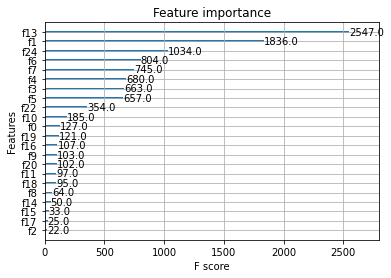

In [96]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(booster)
pyplot.show()

In [97]:
from catboost import CatBoostClassifier
cb=CatBoostClassifier(eval_metric='Accuracy',learning_rate=0.04)
cb=cb.fit(X_train_std,y_train)

0:	learn: 0.7635947	total: 61ms	remaining: 1m
1:	learn: 0.7624499	total: 64.9ms	remaining: 32.4s
2:	learn: 0.7670292	total: 68.6ms	remaining: 22.8s
3:	learn: 0.7683648	total: 72.3ms	remaining: 18s
4:	learn: 0.7723717	total: 76ms	remaining: 15.1s
5:	learn: 0.7765694	total: 79.6ms	remaining: 13.2s
6:	learn: 0.7771418	total: 83.8ms	remaining: 11.9s
7:	learn: 0.7801946	total: 87.3ms	remaining: 10.8s
8:	learn: 0.7775234	total: 90.5ms	remaining: 9.96s
9:	learn: 0.7782866	total: 93.8ms	remaining: 9.29s
10:	learn: 0.7838199	total: 97.1ms	remaining: 8.73s
11:	learn: 0.7876359	total: 101ms	remaining: 8.32s
12:	learn: 0.7893532	total: 105ms	remaining: 7.98s
13:	learn: 0.7901164	total: 109ms	remaining: 7.67s
14:	learn: 0.7889716	total: 113ms	remaining: 7.42s
15:	learn: 0.7903072	total: 117ms	remaining: 7.18s
16:	learn: 0.7941233	total: 121ms	remaining: 6.98s
17:	learn: 0.7960313	total: 125ms	remaining: 6.8s
18:	learn: 0.7950773	total: 128ms	remaining: 6.63s
19:	learn: 0.7960313	total: 132ms	remain

In [98]:
pred=cb.predict(X_test_std)
pred1=pd.DataFrame(pred)

test1=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
Pas=test1['PassengerId']
output=pd.concat([Pas,pred1],axis=1)
output=output.rename(columns={0:'Transported'})
#output['Transported']=output['Transported'].map({1:'True',0:'False'})
output.to_csv('submission.csv', index=False)

In [99]:
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
